# The Look Ecommerce Exploratory Data Analysis Notebook

TheLook is a fictitious eCommerce clothing site developed by the Looker team. The dataset contains information about customers, products, orders, logistics, web events and digital marketing campaigns. The contents of this dataset are synthetic, and are provided to industry practitioners for the purpose of product discovery, testing, and evaluation.

The purpose of this notebook is to explore the dataset and identify key features, trends, patterns, correlations, and answer a few analysis questions. 

The SQL queries utilized to finalize the table used in this analysis can be found [here](https://github.com/teejtolentino/Data-Projects/blob/f3d9d83a2ed3b3a30a9554227fa2463944689418/The%20Look%20Ecommerce/Technical%20Documentation.md).

In [253]:
import pandas as pd
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [254]:
df = pd.read_csv('thelook_ecommerce.csv')

### Basic Data Exploration

In [256]:
# Get the first few rows
df.head()

,order_id,order_date,product_id,category,name,brand,cost,retail_price,department,distribution_center,...,first_name,last_name,age,gender,state,city,country,lat,long,traffic_source
0,105987,2024-06-24 16:55:00 UTC,28462,Accessories,Plain Adjustable Velcro Hats (Many Colors Avai...,Plain Hats,2.000990,4.990000,Men,1,...,Patrick,Sweeney,67,M,Grand Est,Nancy,France,48.688892,6.178068,Organic
1,20891,2024-01-28 02:31:00 UTC,23864,Outerwear & Coats,Men's Moncler Down Vest Tib,Moncler,238.150001,550.000000,Men,1,...,Jeffery,Douglas,58,M,Illinois,Marion,United States,37.718773,-88.910496,Search
2,98935,2024-08-30 10:39:00 UTC,17506,Fashion Hoodies & Sweatshirts,Nintendo Super Mario Bros. Characters Zip Hoodie,Hot Topic,25.938000,49.500000,Men,10,...,Daniel,Nicholson,55,M,Illinois,Marion,United States,37.718773,-88.910496,Search
3,20891,2024-01-28 02:31:00 UTC,16423,Tops & Tees,DC Men's Grady Aint Tee,DC,13.608000,24.000000,Men,4,...,Jeffery,Douglas,58,M,Illinois,Marion,United States,37.718773,-88.910496,Search
4,85342,2024-05-17 01:44:00 UTC,23750,Outerwear & Coats,London Fog Men's Durham Single-Breasted Fly-Fr...,London Fog,49.275519,109.989998,Men,7,...,Derrick,Ward,12,M,Virginia,Sterling,United States,39.012047,-77.396186,Organic


In [257]:
# Get number of rows and columns
df.shape

(45374, 21)

In [258]:
# Get count of non-null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45374 entries, 0 to 45373
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             45374 non-null  int64  
 1   order_date           45374 non-null  object 
 2   product_id           45374 non-null  int64  
 3   category             45374 non-null  object 
 4   name                 45372 non-null  object 
 5   brand                45349 non-null  object 
 6   cost                 45374 non-null  float64
 7   retail_price         45374 non-null  float64
 8   department           45374 non-null  object 
 9   distribution_center  45374 non-null  int64  
 10  sale_price           45374 non-null  float64
 11  first_name           45374 non-null  object 
 12  last_name            45374 non-null  object 
 13  age                  45374 non-null  int64  
 14  gender               45374 non-null  object 
 15  state                45374 non-null 

In [259]:
# Get summary statistics of numeric values
df.describe()

,order_id,product_id,cost,retail_price,distribution_center,sale_price,age,lat,long
count,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000
mean,62413.411337,15306.959206,28.779838,59.830147,4.972760,59.830147,40.844691,28.310610,24.704970
std,35908.093346,8418.409771,31.074562,67.064761,2.893988,67.064761,17.017043,22.085065,89.915258
min,4.000000,1.000000,0.008300,0.020000,1.000000,0.020000,12.000000,-42.964120,-158.164931
25%,31271.000000,8041.250000,11.431000,24.900000,2.000000,24.900000,26.000000,26.085583,-50.618210
50%,62305.500000,16072.000000,19.873801,39.990002,5.000000,39.990002,41.000000,35.238280,4.412131
75%,93511.000000,22646.750000,34.647818,69.949997,8.000000,69.949997,56.000000,40.750468,116.385652
max,124655.000000,29120.000000,557.151002,999.000000,10.000000,999.000000,70.000000,64.865194,153.490393


### Data Cleaning

#### Missing Values

In [262]:
# Count missing values in each column
df.isnull().sum()

order_id                 0
order_date               0
product_id               0
category                 0
name                     2
brand                   25
cost                     0
retail_price             0
department               0
distribution_center      0
sale_price               0
first_name               0
last_name                0
age                      0
gender                   0
state                    0
city                   412
country                  0
lat                      0
long                     0
traffic_source           0
dtype: int64

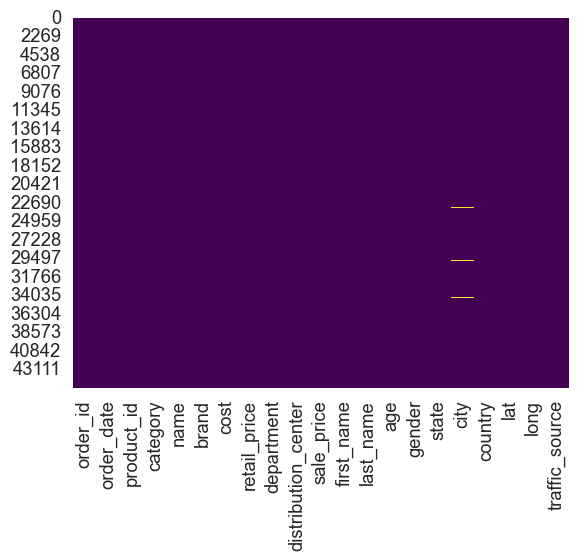

In [263]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [264]:
# Check percentage of missing values
(df.isnull().sum()/df.count())*100

order_id               0.000000
order_date             0.000000
product_id             0.000000
category               0.000000
name                   0.004408
brand                  0.055128
cost                   0.000000
retail_price           0.000000
department             0.000000
distribution_center    0.000000
sale_price             0.000000
first_name             0.000000
last_name              0.000000
age                    0.000000
gender                 0.000000
state                  0.000000
city                   0.916329
country                0.000000
lat                    0.000000
long                   0.000000
traffic_source         0.000000
dtype: float64

In [265]:
# We'll drop the missing values
df = df.dropna()

In [266]:
df.isnull().sum()

order_id               0
order_date             0
product_id             0
category               0
name                   0
brand                  0
cost                   0
retail_price           0
department             0
distribution_center    0
sale_price             0
first_name             0
last_name              0
age                    0
gender                 0
state                  0
city                   0
country                0
lat                    0
long                   0
traffic_source         0
dtype: int64

#### Duplicates

In [268]:
# Find duplicate rows
df.duplicated().sum()

0

In [269]:
# If we want to see what rows are duplicates
for i, row in enumerate(df.duplicated()):
    if row == True:
        print(i, row)
    else:
        pass

In [270]:
# Drop duplicate rows 
df.drop_duplicates(inplace=True)

### Data Aggregation
* Create an orders dataframe that groups order_id and summarizes information from other features. Aggregates information such as:
    - number of products sold per order_id
    - total cost per order_id
    - total sales per order_id
    
* The original df shows information *per transaction*.

In [272]:
df.columns

Index(['order_id', 'order_date', 'product_id', 'category', 'name', 'brand',
       'cost', 'retail_price', 'department', 'distribution_center',
       'sale_price', 'first_name', 'last_name', 'age', 'gender', 'state',
       'city', 'country', 'lat', 'long', 'traffic_source'],
      dtype='object')

In [273]:
# Create orders df that summarizes features per order (the original df is per transaction)
orders = df.groupby(['order_id', 
                     'order_date',
                     'department',
                     'first_name', 
                     'last_name', 
                     'age', 
                     'gender', 
                     'state',
                     'city', 
                     'country', 
                     'lat', 
                     'long']).agg({
    'product_id': 'count', 
    'category': 'count', 
    'name': 'count', 
    'brand': 'count', 
    'cost': 'sum', 
    'retail_price': 'sum',
    'distribution_center': 'count',
    'sale_price': 'sum'})

orders.reset_index(inplace=True)

In [274]:
orders.head()

,order_id,order_date,department,first_name,last_name,age,gender,state,city,country,lat,long,product_id,category,name,brand,cost,retail_price,distribution_center,sale_price
0,4,2021-02-15 04:06:00 UTC,Men,Willie,Shea,27,M,Nordrhein-Westfalen,Tönisvorst,Germany,51.316466,6.452439,2,2,2,2,66.391759,120.129997,2,120.129997
1,5,2024-06-30 01:02:00 UTC,Women,Diane,Avery,46,F,New South Wales,Sydney,Australia,-33.933480,150.918716,1,1,1,1,6.827120,13.990000,1,13.990000
2,9,2024-06-07 01:09:00 UTC,Women,Crystal,Leblanc,67,F,Gyeongsangnam-do,Gimhae City,South Korea,35.194116,128.823499,1,1,1,1,29.160000,60.000000,1,60.000000
3,17,2023-11-22 04:21:00 UTC,Women,Kimberly,Ochoa,57,F,California,Paso Robles,United States,35.663885,-120.771267,1,1,1,1,9.746100,24.990000,1,24.990000
4,21,2022-12-22 00:03:00 UTC,Men,Nicholas,Russell,27,M,Oregon,Springfield,United States,44.096696,-122.837736,1,1,1,1,65.155249,164.949997,1,164.949997


### Univariate Analysis
- Explore individual features

In [276]:
orders.columns

Index(['order_id', 'order_date', 'department', 'first_name', 'last_name',
       'age', 'gender', 'state', 'city', 'country', 'lat', 'long',
       'product_id', 'category', 'name', 'brand', 'cost', 'retail_price',
       'distribution_center', 'sale_price'],
      dtype='object')

For categorical values, check distribution of values

In [278]:
df['category'].value_counts().head(10)

category
Intimates                        3431
Jeans                            3114
Fashion Hoodies & Sweatshirts    2944
Tops & Tees                      2887
Shorts                           2797
Sweaters                         2781
Swim                             2763
Sleep & Lounge                   2686
Accessories                      2401
Outerwear & Coats                2358
Name: count, dtype: int64

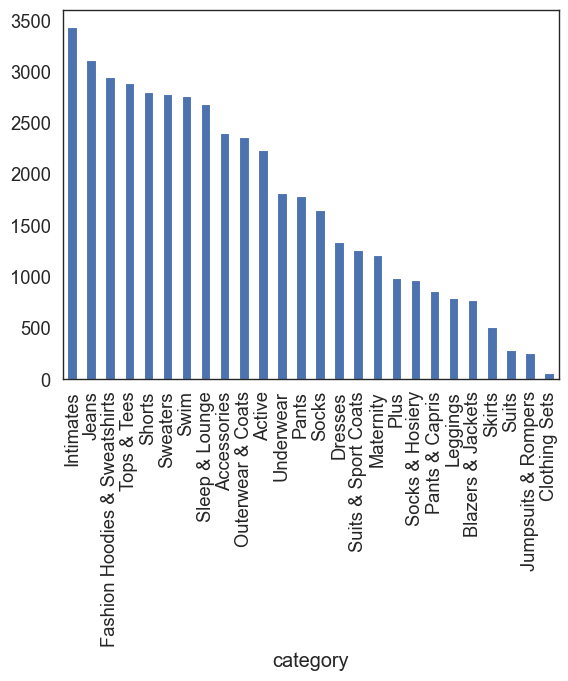

In [279]:
df['category'].value_counts().plot(kind='bar')
plt.show()

In [280]:
orders['country'].value_counts()

country
China             10496
United States      6955
Brasil             4377
South Korea        1719
France             1466
United Kingdom     1457
Germany            1274
Spain              1238
Japan               758
Australia           696
Belgium             431
Poland               66
Austria               3
Colombia              2
Name: count, dtype: int64

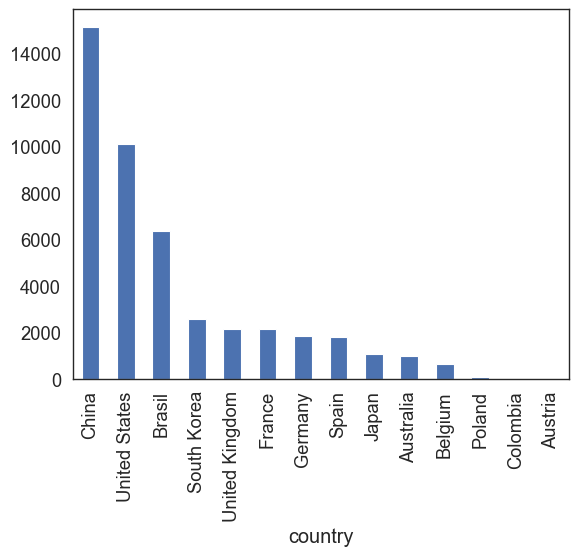

In [281]:
df['country'].value_counts().plot(kind='bar')
plt.show()

In [282]:
orders['gender'].value_counts()

gender
M    15488
F    15450
Name: count, dtype: int64

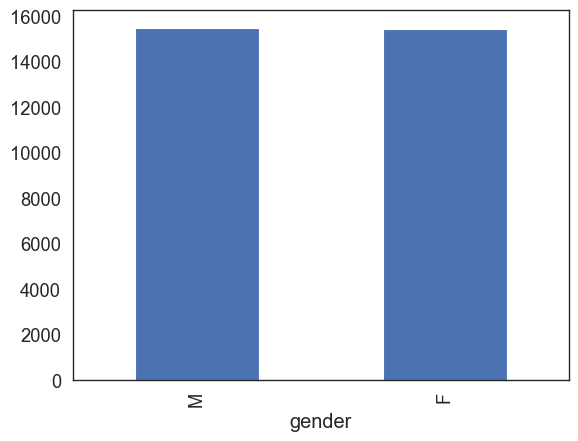

In [283]:
orders['gender'].value_counts().plot(kind='bar')
plt.show()

For numerical values, explore distribution

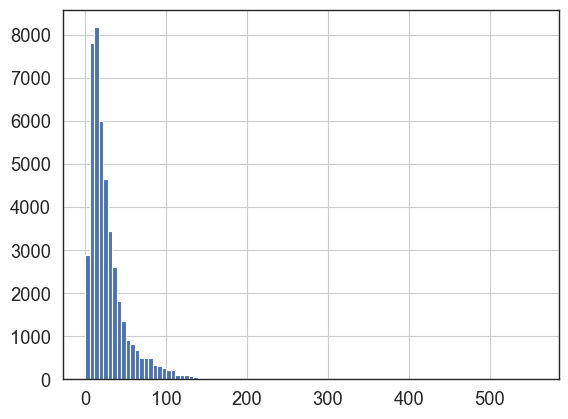

In [285]:
df['cost'].hist(bins=100)
plt.show()

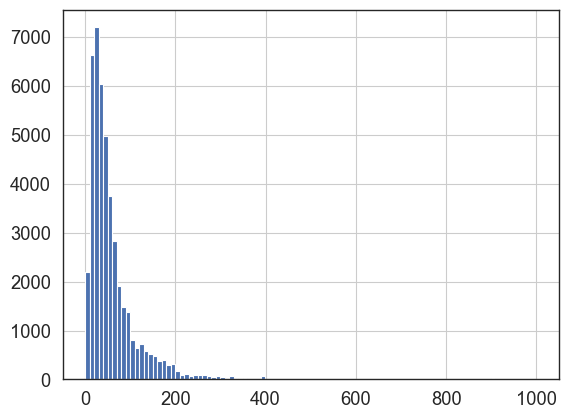

In [286]:
df['retail_price'].hist(bins=100)
plt.show()

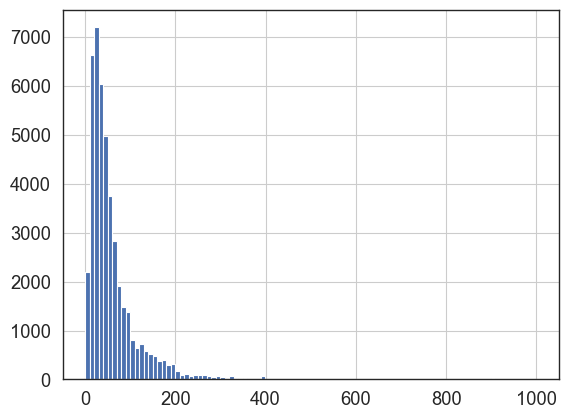

In [287]:
df['sale_price'].hist(bins=100)
plt.show()

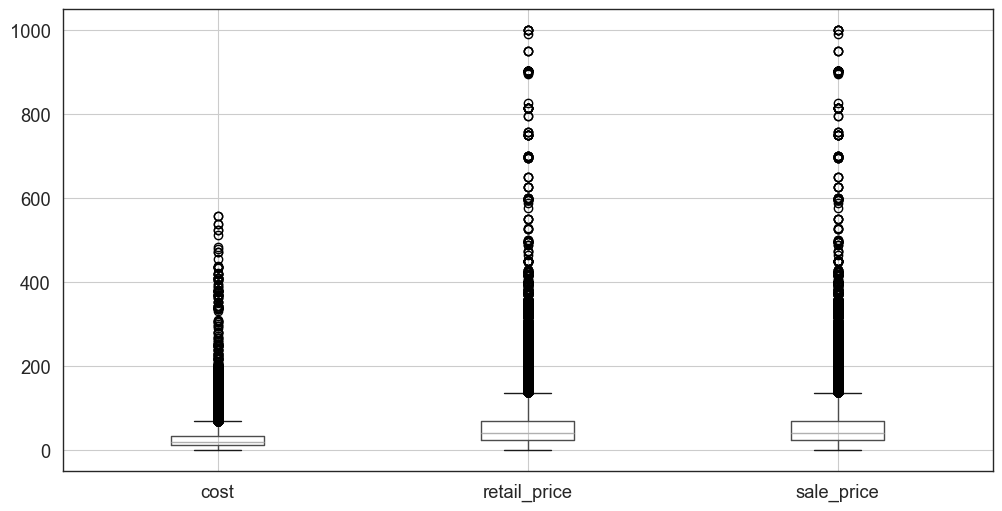

In [288]:
df.boxplot(column=['cost', 'retail_price','sale_price'], figsize=(12,6))
plt.show()

### Bivariate Analysis
- Explore relationships between variables

In [290]:
#set up the general appearance of the plots
sns.set(style='white')
sns.set_context("paper", font_scale=1.5) 

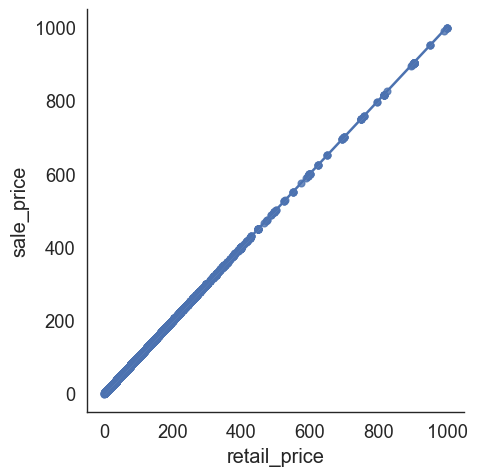

In [291]:
# Numeric vs Numeric
sns.lmplot(x='retail_price', y='sale_price', data=df)
#plt.savefig('.../plots/retail vs sale.png')
plt.show()

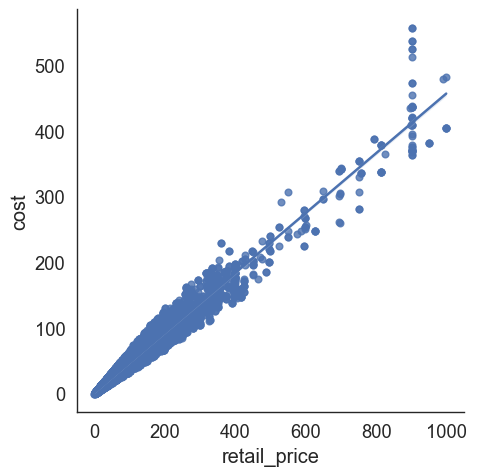

In [292]:
sns.lmplot(x='retail_price', y='cost', data=df)
plt.show()

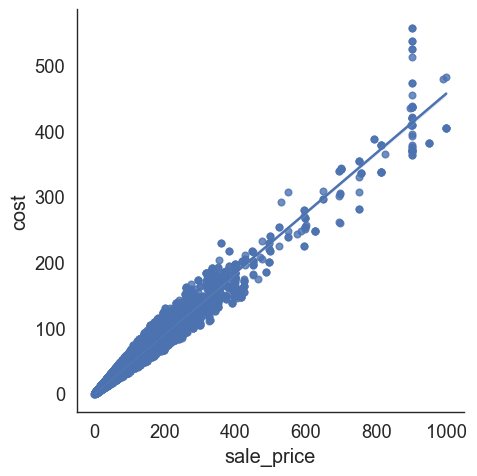

In [293]:
sns.lmplot(x='sale_price', y='cost', data=df)
plt.savefig('.../plots/sale vs cost.png')
plt.show()

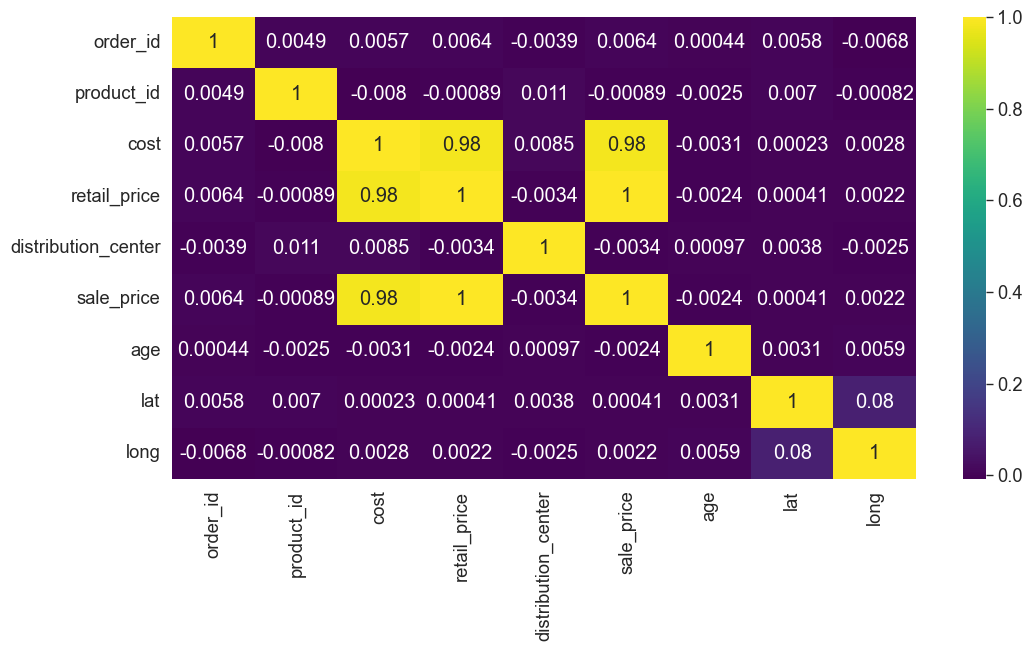

In [294]:
# Correlation matrix
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

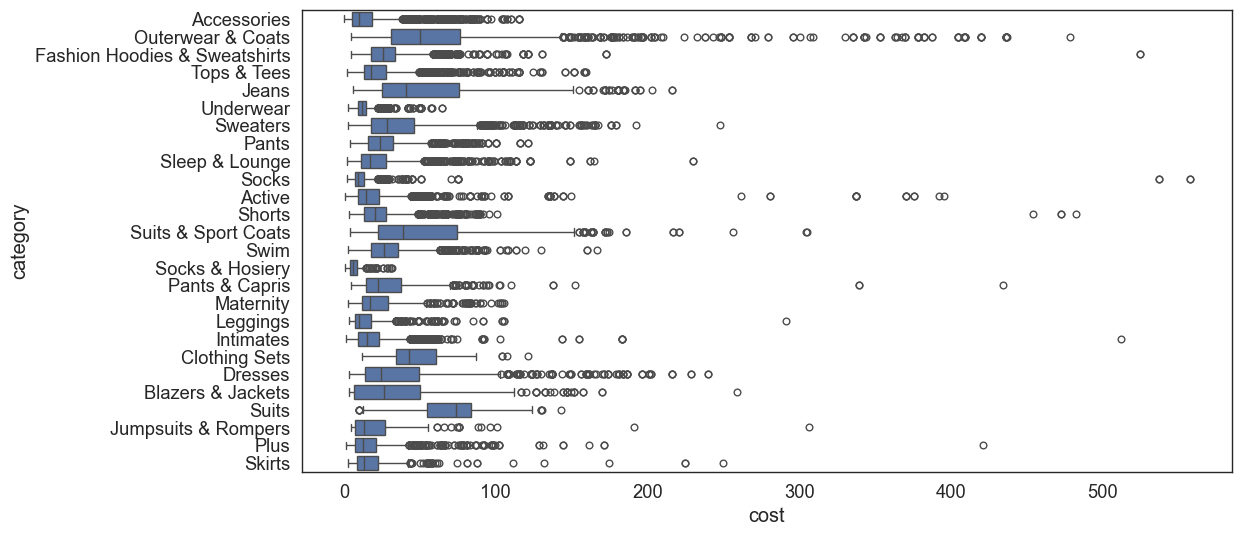

In [295]:
# Catrgorical vs Numeric
plt.figure(figsize=(12, 6))
sns.boxplot(x='cost', y='category', data=df)
plt.show()

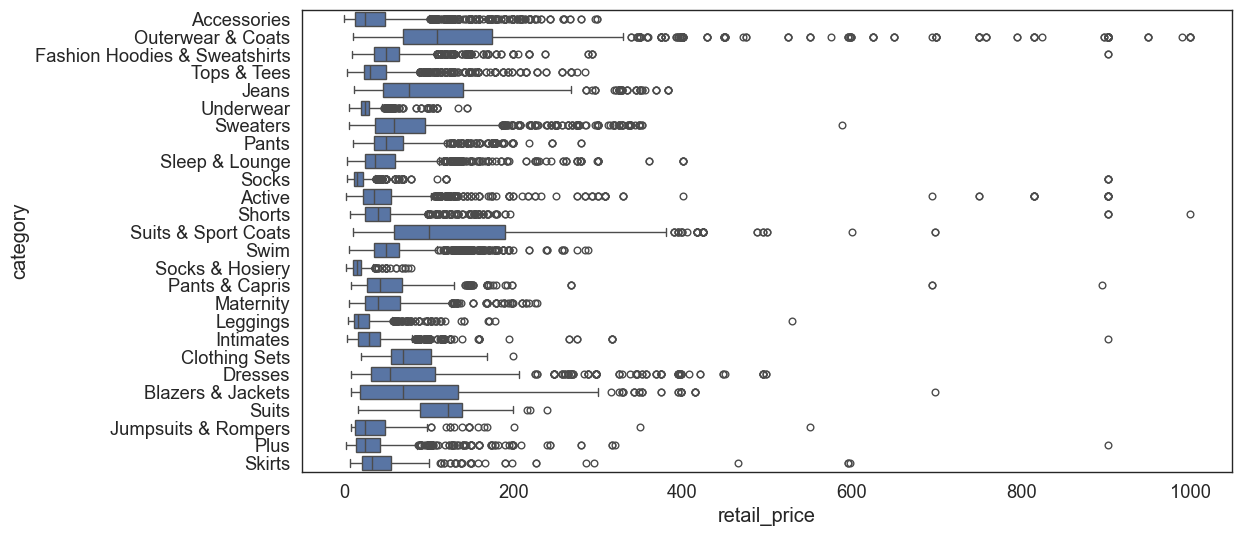

In [296]:
# Catrgorical vs Numeric
plt.figure(figsize=(12, 6))
sns.boxplot(x='retail_price', y='category', data=df)
plt.savefig('.../plots/outliers across categories')
plt.show()

In [297]:
# Outlier products -- extreme prices
query = "SELECT category, name, retail_price FROM df WHERE retail_price > 400"

# Execute the query
expensive_products = psql.sqldf(query, locals())

In [298]:
expensive_products.head()

,category,name,retail_price
0,Outerwear & Coats,Men's Moncler Down Vest Tib,550.00000
1,Outerwear & Coats,Diesel Men's Lisardo Jacket,758.00000
2,Outerwear & Coats,Darla,999.00000
3,Outerwear & Coats,Canada Goose Men's Citadel Parka,795.00000
4,Suits & Sport Coats,Sandals Cay Men's Three-Button Cashmere Blend ...,499.98999


In [299]:
expensive_products[expensive_products['retail_price'] == 999].value_counts()

category           name                             retail_price
Outerwear & Coats  Darla                            999.0           4
Shorts             Alpha Industries Rip Stop Short  999.0           1
Name: count, dtype: int64

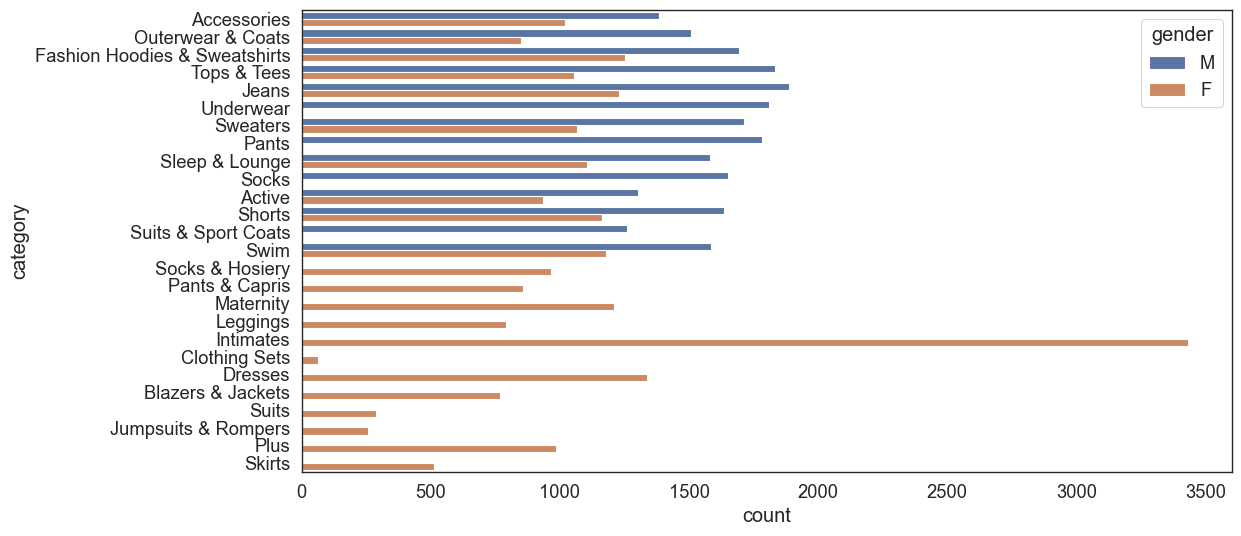

In [300]:
# Catrgorical vs Categorical
plt.figure(figsize=(12, 6))
sns.countplot(y='category', hue='gender', data=df)
plt.show()

In [301]:
# Let's confirm that some categories don't have male buyers
category_gender_count = df.groupby('category')['gender'].value_counts()
print(category_gender_count)

category                       gender
Accessories                    M         1382
                               F         1019
Active                         M         1301
                               F          935
Blazers & Jackets              F          767
Clothing Sets                  F           63
Dresses                        F         1336
Fashion Hoodies & Sweatshirts  M         1693
                               F         1251
Intimates                      F         3431
Jeans                          M         1887
                               F         1227
Jumpsuits & Rompers            F          258
Leggings                       F          790
Maternity                      F         1210
Outerwear & Coats              M         1508
                               F          850
Pants                          M         1782
Pants & Capris                 F          857
Plus                           F          985
Shorts                         M         1

### Feature Engineering
* Create new features from existing data

In [303]:
df.head()

,order_id,order_date,product_id,category,name,brand,cost,retail_price,department,distribution_center,...,first_name,last_name,age,gender,state,city,country,lat,long,traffic_source
0,105987,2024-06-24 16:55:00 UTC,28462,Accessories,Plain Adjustable Velcro Hats (Many Colors Avai...,Plain Hats,2.000990,4.990000,Men,1,...,Patrick,Sweeney,67,M,Grand Est,Nancy,France,48.688892,6.178068,Organic
1,20891,2024-01-28 02:31:00 UTC,23864,Outerwear & Coats,Men's Moncler Down Vest Tib,Moncler,238.150001,550.000000,Men,1,...,Jeffery,Douglas,58,M,Illinois,Marion,United States,37.718773,-88.910496,Search
2,98935,2024-08-30 10:39:00 UTC,17506,Fashion Hoodies & Sweatshirts,Nintendo Super Mario Bros. Characters Zip Hoodie,Hot Topic,25.938000,49.500000,Men,10,...,Daniel,Nicholson,55,M,Illinois,Marion,United States,37.718773,-88.910496,Search
3,20891,2024-01-28 02:31:00 UTC,16423,Tops & Tees,DC Men's Grady Aint Tee,DC,13.608000,24.000000,Men,4,...,Jeffery,Douglas,58,M,Illinois,Marion,United States,37.718773,-88.910496,Search
4,85342,2024-05-17 01:44:00 UTC,23750,Outerwear & Coats,London Fog Men's Durham Single-Breasted Fly-Fr...,London Fog,49.275519,109.989998,Men,7,...,Derrick,Ward,12,M,Virginia,Sterling,United States,39.012047,-77.396186,Organic


In [304]:
gender_products = df.groupby('gender').agg(product_count=('product_id', 'count'), total_sales=('sale_price', 'sum'))
gender_products['total_sales'] = round(gender_products['total_sales'], 2)

In [305]:
gender_products

,product_count,total_sales
gender,,
F,22309,1251869.32
M,22626,1440077.66


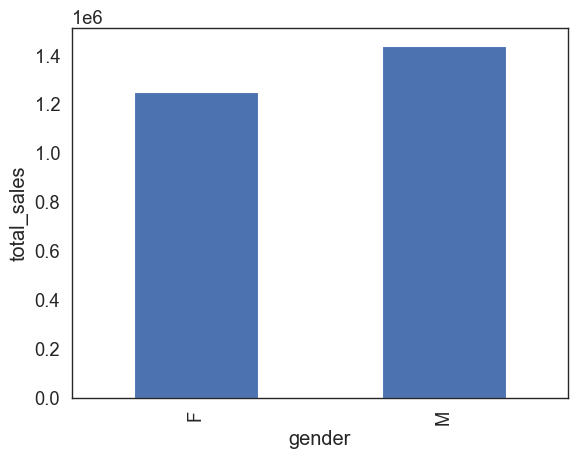

In [306]:
gender_products['total_sales'].plot(kind='bar')
plt.ylabel('total_sales')
plt.show()

In [307]:
df.head(3)

,order_id,order_date,product_id,category,name,brand,cost,retail_price,department,distribution_center,...,first_name,last_name,age,gender,state,city,country,lat,long,traffic_source
0,105987,2024-06-24 16:55:00 UTC,28462,Accessories,Plain Adjustable Velcro Hats (Many Colors Avai...,Plain Hats,2.000990,4.99,Men,1,...,Patrick,Sweeney,67,M,Grand Est,Nancy,France,48.688892,6.178068,Organic
1,20891,2024-01-28 02:31:00 UTC,23864,Outerwear & Coats,Men's Moncler Down Vest Tib,Moncler,238.150001,550.00,Men,1,...,Jeffery,Douglas,58,M,Illinois,Marion,United States,37.718773,-88.910496,Search
2,98935,2024-08-30 10:39:00 UTC,17506,Fashion Hoodies & Sweatshirts,Nintendo Super Mario Bros. Characters Zip Hoodie,Hot Topic,25.938000,49.50,Men,10,...,Daniel,Nicholson,55,M,Illinois,Marion,United States,37.718773,-88.910496,Search


In [308]:
df.isnull().sum()

order_id               0
order_date             0
product_id             0
category               0
name                   0
brand                  0
cost                   0
retail_price           0
department             0
distribution_center    0
sale_price             0
first_name             0
last_name              0
age                    0
gender                 0
state                  0
city                   0
country                0
lat                    0
long                   0
traffic_source         0
dtype: int64

In [309]:
# Date transformation
df['order_date'] = pd.to_datetime(df['order_date'], format='mixed', dayfirst=True)
orders['order_date'] = pd.to_datetime(df['order_date'], format='mixed', dayfirst=True)

In [310]:
orders.head()

,order_id,order_date,department,first_name,last_name,age,gender,state,city,country,lat,long,product_id,category,name,brand,cost,retail_price,distribution_center,sale_price
0,4,2024-06-24 16:55:00+00:00,Men,Willie,Shea,27,M,Nordrhein-Westfalen,Tönisvorst,Germany,51.316466,6.452439,2,2,2,2,66.391759,120.129997,2,120.129997
1,5,2024-01-28 02:31:00+00:00,Women,Diane,Avery,46,F,New South Wales,Sydney,Australia,-33.933480,150.918716,1,1,1,1,6.827120,13.990000,1,13.990000
2,9,2024-08-30 10:39:00+00:00,Women,Crystal,Leblanc,67,F,Gyeongsangnam-do,Gimhae City,South Korea,35.194116,128.823499,1,1,1,1,29.160000,60.000000,1,60.000000
3,17,2024-01-28 02:31:00+00:00,Women,Kimberly,Ochoa,57,F,California,Paso Robles,United States,35.663885,-120.771267,1,1,1,1,9.746100,24.990000,1,24.990000
4,21,2024-05-17 01:44:00+00:00,Men,Nicholas,Russell,27,M,Oregon,Springfield,United States,44.096696,-122.837736,1,1,1,1,65.155249,164.949997,1,164.949997


In [311]:
#orders.drop(['year','month','day_of_week'],axis=1,inplace=True)

In [312]:
# Inserting columns based on date
# Mapping months and days

mmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
dmap = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat'}

orders.insert(loc=2, column='month', value=orders['order_date'].apply(lambda date:date.month))
orders.insert(loc=3, column='year', value=orders['order_date'].apply(lambda date:date.year))
orders.insert(loc=4, column='day_of_week', value=orders['order_date'].apply(lambda date:date.day_of_week))

#orders['year'] = orders['year'].apply(lambda year:int(year))
#orders['year'] = orders['year'].apply(lambda year:str(year))

year_sales = orders.groupby('year').agg(total_sales=('sale_price', 'sum'))
month_sales = orders.groupby('month').agg(total_sales=('sale_price', 'sum'))
day_sales = orders.groupby('day_of_week').agg(total_sales=('sale_price', 'sum'))

year_sales['total_sales'] = round(year_sales['total_sales'], 2)
month_sales['total_sales'] = round(month_sales['total_sales'], 2)
day_sales['total_sales'] = round(day_sales['total_sales'], 2)

year_sales.reset_index(inplace=True)
month_sales.reset_index(inplace=True)
day_sales.reset_index(inplace=True)

year_sales.sort_values('year', ascending=True)
month_sales.sort_values('month', ascending=True)
day_sales.sort_values('day_of_week', ascending=True)

orders['month'] = orders['month'].map(mmap)
month_sales['month'] = month_sales['month'].map(mmap)

orders['day_of_week'] = orders['day_of_week'].map(dmap)
day_sales['day_of_week'] = day_sales['day_of_week'].map(dmap)

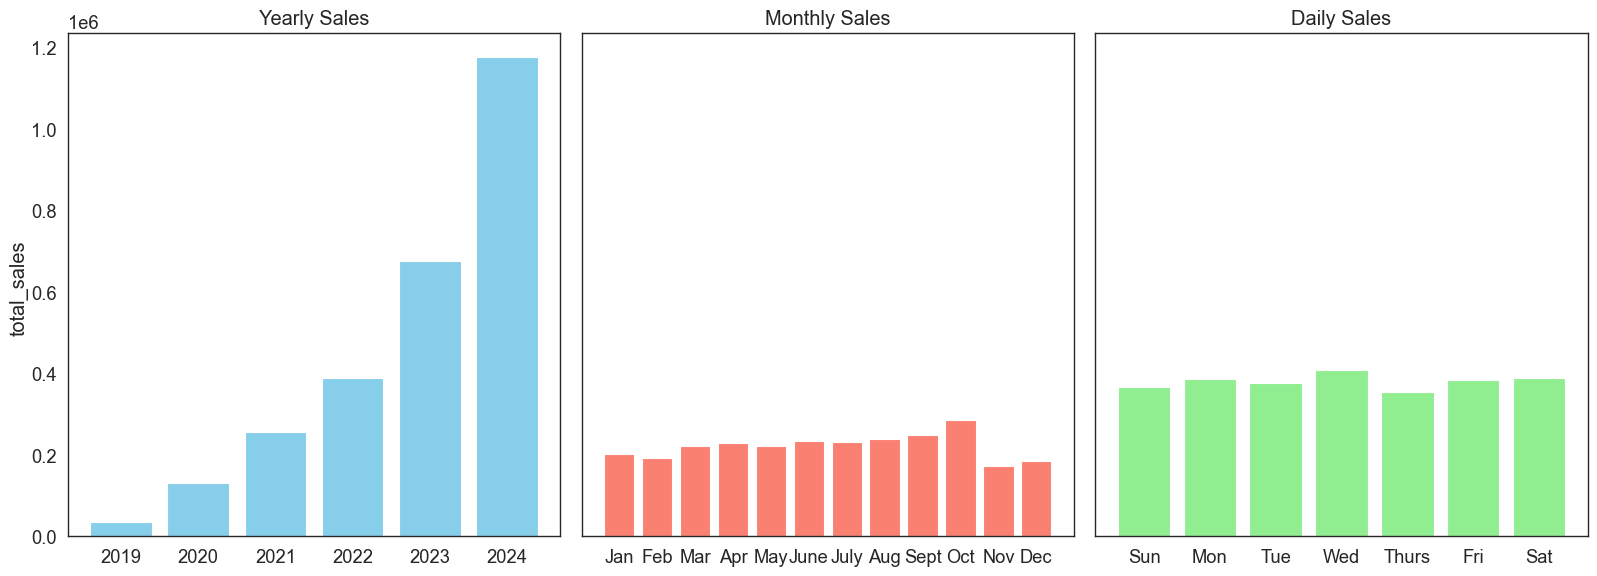

In [313]:
# Create subplots
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

# Plot each bar plot on a different subplot
axs[0].bar(year_sales['year'], year_sales['total_sales'], color='skyblue')
axs[0].set_title('Yearly Sales')

axs[1].bar(month_sales['month'], month_sales['total_sales'], color='salmon')
axs[1].set_title('Monthly Sales')

axs[2].bar(day_sales['day_of_week'], day_sales['total_sales'], color='lightgreen')
axs[2].set_title('Daily Sales')

# Set common y-axis label
fig.text(0.0005, 0.5, 'total_sales', va='center', rotation='vertical')

# Show the plot
plt.tight_layout()
plt.show()

In [314]:
# Bin numerical values
df.insert(loc=14, column="age_group", value=pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], labels=['children', 'youth', 'adult', 'middle-aged', 'senior']))

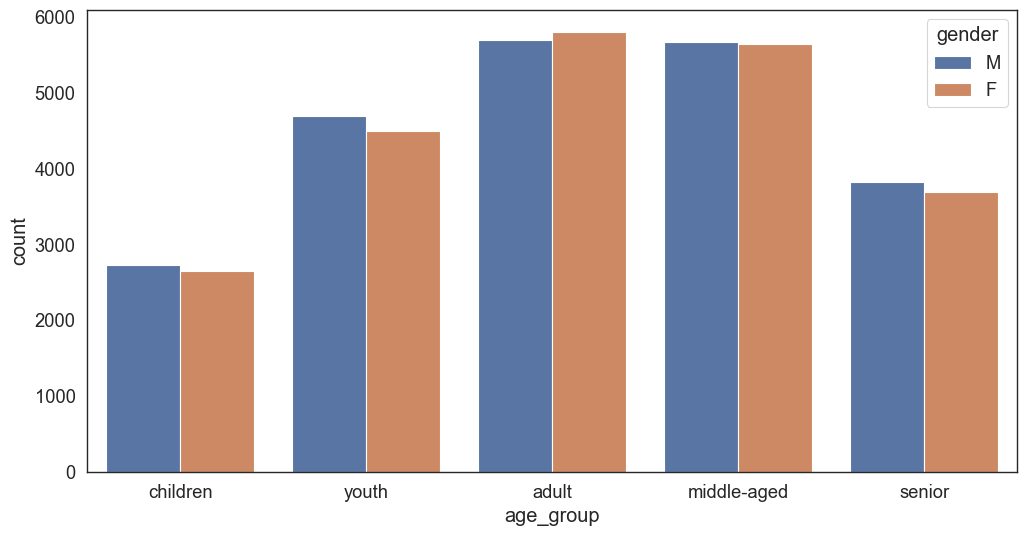

In [315]:
plt.figure(figsize=(12,6))
sns.countplot(x='age_group', hue='gender', data=df)
plt.show()

### Outlier Detection

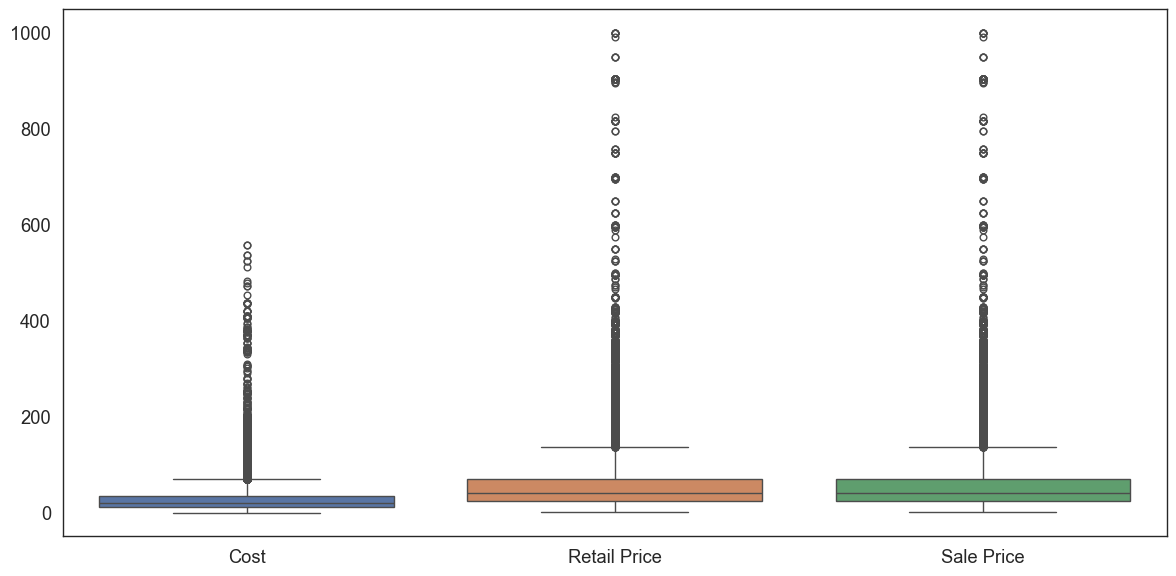

In [317]:
plt.figure(figsize=(12,6))
sns.boxplot(data=[df['cost'],df['retail_price'],df['sale_price']])
xvalues=['Cost','Retail Price','Sale Price']
plt.xticks(np.arange(3),xvalues)
plt.tight_layout()
plt.savefig('.../plots/outliers')
plt.show()

### Summary Findings

**Identical sale and retail prices:** Which means both features could be used to compute total sales.

**Upward yearly sales trend:** Sales figures have been steadily rising since 2019, with 2024 being the most profitable year for The Look Ecommerce.

**Most ordered product categories:** Intimates, Jeans, Fashion Hoodies & Sweatshirts, Tops & Tees, Shorts are the most ordered product categories.

**Top countries with most order volumes:** China (10.5k), United States (6.9K), and Brazil (4.3K)  are the top three countries with the most number of orders. 

**Order Volume and Product Sales by gender:** Both male and female customers have almost the same order volume (15,492 and 15,459 orders respectively). However, male customers slightly bought more products than women (22,834 and 22,540 respectively) despite the women’s department having more product offerings (15,988 products compared to 13,130 in men). 

**Perfectly correlated retail and sale prices:** There is no difference between the retail and sale prices; meaning no added or discounted prices were applied to the product when the customer purchased it.

**Very high correlation between cost, retail, and sale prices:** The cost of each product is highly correlated with its retail and sales prices. The higher the cost of the product, the higher it is being sold. 

**Wide range of retail prices:** There are many outliers at the upper end for both cost and retail price in every product category, indicating that some products are being sold at expensive prices.
    
**Outliers in cost, retail, and sale prices:** Upon investigation, the outliers in these three metrics are consistent across product categories. It is therefore assumed that these values represent specific products with cost and prices that are different from the majority of the other items. These could be luxury items which indeed have higher cost and prices. However, these outliers are still worth investigating because there seems to be products that are way too expensive. For example, does the Alpha Industries Rip Stop Short really cost $999? But for now, we'll leave it at that.
